In [1]:

# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#load training datasets
url = "https://raw.githubusercontent.com/FLIU253/machine-learning/master/spotify-mood-music-recommendations/version1/cleaned%20data%20v2.csv?token=AGLVLQEGTMSRJ2D3ZTSUMXK56DZ66"
names = ["acounsticness", "danceability", "energy", "instrumentalness", "key", "liveness", "loudness", "mode", "speechiness", "tempo", "time_signature", "valence", "song_title", "artist", "emotion"]
dataset = read_csv(url, names=names)

In [15]:
#shape
print(dataset.values)

[[0.0102 0.833 0.434 ... 'Mask Off' 'Future' 'happy']
 [0.19899999999999998 0.743 0.359 ... 'Redbone' 'Childish Gambino' 'calm']
 [0.0344 0.838 0.41200000000000003 ... 'Xanny Family' 'Future' 'calm']
 ...
 [0.000239 0.32899999999999996 0.8140000000000001 ... 'The Moment'
  'Tame Impala' 'happy']
 [0.19 0.7759999999999999 0.507 ... 'Secret Love' 'JoJo' 'calm']
 [0.198 0.89 0.52 ... 'Something About You - Extended Mix' 'Hayden James'
  'happy']]


In [3]:
print(dataset.head())

   acounsticness  danceability  energy  instrumentalness  key  liveness  \
0         0.0102         0.833   0.434          0.021900    2    0.1650   
1         0.1990         0.743   0.359          0.006110    1    0.1370   
2         0.0344         0.838   0.412          0.000234    2    0.1590   
3         0.6040         0.494   0.338          0.510000    5    0.0922   
4         0.1800         0.678   0.561          0.512000    5    0.4390   

   loudness  mode  speechiness    tempo  time_signature  valence  \
0    -8.795     1       0.4310  150.062               4    0.286   
1   -10.401     1       0.0794  160.083               4    0.588   
2    -7.148     1       0.2890   75.044               4    0.173   
3   -15.236     1       0.0261   86.468               4    0.230   
4   -11.648     0       0.0694  174.004               4    0.904   

       song_title            artist emotion  
0        Mask Off            Future   happy  
1         Redbone  Childish Gambino    calm  
2 

In [4]:
print(dataset.describe())
print(dataset.groupby('emotion').size())

       acounsticness  danceability      energy  instrumentalness         key  \
count     148.000000    148.000000  148.000000        148.000000  148.000000   
mean        0.157763      0.647264    0.647460          0.140012    5.006757   
std         0.222304      0.159601    0.189089          0.258040    3.793113   
min         0.000008      0.191000    0.086100          0.000000    0.000000   
25%         0.010200      0.548500    0.512750          0.000000    1.000000   
50%         0.046950      0.664500    0.661500          0.000161    5.000000   
75%         0.235500      0.763500    0.795750          0.126250    9.000000   
max         0.918000      0.959000    0.981000          0.921000   11.000000   

         liveness    loudness        mode  speechiness       tempo  \
count  148.000000  148.000000  148.000000   148.000000  148.000000   
mean     0.206644   -7.566291    0.662162     0.101809  119.895581   
std      0.159088    3.127783    0.474579     0.100059   25.601776   

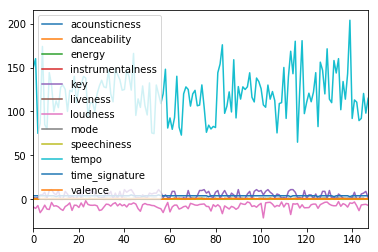

In [5]:
#visualization
dataset.plot()
pyplot.show()

In [6]:
array = dataset.values
x = array[:, 0:12]
y= array[:,14]
print(x)
print(y)
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.05, random_state=10)

[[0.0102 0.833 0.434 ... 150.062 4 0.28600000000000003]
 [0.19899999999999998 0.743 0.359 ... 160.083 4 0.588]
 [0.0344 0.838 0.41200000000000003 ... 75.044 4 0.17300000000000001]
 ...
 [0.000239 0.32899999999999996 0.8140000000000001 ... 120.462 4
  0.40299999999999997]
 [0.19 0.7759999999999999 0.507 ... 98.051 4 0.51]
 [0.198 0.89 0.52 ... 114.959 4 0.7170000000000001]]
['happy' 'calm' 'calm' 'sad' 'sad' 'happy' 'anger' 'calm' 'anger' 'anger'
 'happy' 'happy' 'calm' 'calm' 'calm' 'anger' 'happy' 'happy' 'anger'
 'happy' 'happy' 'anger' 'anger' 'anger' 'sad' 'anger' 'anger' 'anger'
 'anger' 'anger' 'anger' 'calm' 'anger' 'anger' 'calm' 'anger' 'anger'
 'anger' 'anger' 'happy' 'happy' 'anger' 'calm' 'anger' 'anger' 'calm'
 'happy' 'happy' 'happy' 'happy' 'calm' 'calm' 'sad' 'sad' 'calm' 'calm'
 'calm' 'calm' 'calm' 'sad' 'sad' 'sad' 'calm' 'sad' 'calm' 'sad' 'happy'
 'calm' 'happy' 'anger' 'happy' 'calm' 'calm' 'happy' 'happy' 'happy'
 'sad' 'sad' 'sad' 'calm' 'calm' 'anger' 'calm' 'c

In [7]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
print("accuracy percentage", "standard deviation" )
for name, model in models:
    kfold = StratifiedKFold(n_splits=4, random_state=1)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

accuracy percentage standard deviation
LR: 0.451209 (0.038210)
LDA: 0.485931 (0.033689)
KNN: 0.386219 (0.048768)
CART: 0.393994 (0.060296)
NB: 0.424026 (0.090693)
SVM: 0.393759 (0.038132)


In [8]:
model =LinearDiscriminantAnalysis()
model.fit(x_train, y_train)
predictions = model.predict(x_validation)

In [9]:
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.875
[[1 0 0 0]
 [0 1 0 0]
 [1 0 3 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

       anger       0.50      1.00      0.67         1
        calm       1.00      1.00      1.00         1
       happy       1.00      0.75      0.86         4
         sad       1.00      1.00      1.00         2

   micro avg       0.88      0.88      0.88         8
   macro avg       0.88      0.94      0.88         8
weighted avg       0.94      0.88      0.89         8



In [10]:
test_url = "https://raw.githubusercontent.com/FLIU253/machine-learning/master/spotify-mood-music-recommendations/version1/cleaned%20master.csv?token=AGLVLQAK3UDBQWTXVVZGCMK56EOPI"
test_dataset = read_csv(test_url)
print(test_dataset)

        0.0102  0.833  0.434    0.0219   2   0.165  -8.795  1   0.431  \
0     0.199000  0.743  0.359  0.006110   1  0.1370 -10.401  1  0.0794   
1     0.034400  0.838  0.412  0.000234   2  0.1590  -7.148  1  0.2890   
2     0.604000  0.494  0.338  0.510000   5  0.0922 -15.236  1  0.0261   
3     0.180000  0.678  0.561  0.512000   5  0.4390 -11.648  0  0.0694   
4     0.004790  0.804  0.560  0.000000   8  0.1640  -6.682  1  0.1850   
5     0.014500  0.739  0.472  0.000007   1  0.2070 -11.204  1  0.1560   
6     0.020200  0.266  0.348  0.664000  10  0.1600 -11.609  0  0.0371   
7     0.048100  0.603  0.944  0.000000  11  0.3420  -3.626  0  0.3470   
8     0.002080  0.836  0.603  0.000000   7  0.5710  -7.792  1  0.2370   
9     0.057200  0.525  0.855  0.014300   5  0.6490  -7.372  0  0.0548   
10    0.091500  0.753  0.748  0.003480  10  0.2120  -8.620  1  0.0494   
11    0.253000  0.603  0.434  0.061900   0  0.1080 -11.062  1  0.0342   
12    0.366000  0.762  0.476  0.000000   0  0.1030 

In [32]:
test_array = test_dataset.values
x = test_array[:,0:12]
new_data = []
for data in x:
     new_data.extend(model.predict([data]))

In [33]:
print(new_data)

['calm', 'anger', 'sad', 'happy', 'anger', 'calm', 'sad', 'anger', 'anger', 'happy', 'happy', 'calm', 'calm', 'calm', 'anger', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'anger', 'calm', 'sad', 'happy', 'anger', 'anger', 'calm', 'calm', 'calm', 'anger', 'anger', 'anger', 'happy', 'anger', 'happy', 'anger', 'happy', 'happy', 'happy', 'anger', 'calm', 'anger', 'anger', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'sad', 'sad', 'calm', 'calm', 'calm', 'calm', 'calm', 'sad', 'sad', 'calm', 'happy', 'happy', 'happy', 'happy', 'calm', 'calm', 'happy', 'anger', 'happy', 'sad', 'happy', 'happy', 'happy', 'anger', 'sad', 'sad', 'sad', 'calm', 'happy', 'anger', 'happy', 'calm', 'anger', 'happy', 'happy', 'happy', 'happy', 'happy', 'anger', 'happy', 'anger', 'happy', 'happy', 'happy', 'happy', 'happy', 'sad', 'anger', 'happy', 'anger', 'anger', 'happy', 'anger', 'happy', 'happy', 'sad', 'anger', 'sad', 'sad', 'happy', 'calm', 'anger', 'anger', 'anger', 'anger', 'happy

In [39]:
test_dataset['mood'] = new_data
print(test_dataset.values)

[[0.19899999999999998 0.743 0.359 ... 'Redbone' 'Childish Gambino' 'calm']
 [0.0344 0.838 0.41200000000000003 ... 'Xanny Family' 'Future' 'anger']
 [0.604 0.494 0.33799999999999997 ... 'Master Of None' 'Beach House'
  'sad']
 ...
 [0.00857 0.637 0.935 ... 'Habit - Dack Janiels & Wenzday Remix'
  'Rain Man' 'anger']
 [0.00164 0.557 0.992 ... 'First Contact' 'Twin Moons' 'happy']
 [0.00281 0.446 0.915 ... 'I Wanna Get Better' 'Bleachers' 'anger']]


In [40]:
test_dataset.to_csv('cleaned master data with mood.csv')